This is a piece of code to be able to visualize acc,ppg, and events data. 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.switch_backend('agg')
from mpl_toolkits.mplot3d import Axes3D
import neurokit2 as nk
import random
path = "/scratch/alim/overnight_validation/MUSE-PSG/"

#get mean, std, variance
#central apnea



In [6]:
import os

def read_files_in_directory(directory_path):
    try:
        print("Finding all MUSE-PSG files")
        # Get a list of all files in the directory
        file_list = sorted([entry.name for entry in os.scandir(directory_path) if
                    entry.is_file() and any(keyword in entry.name for keyword in ['ppg', 'acc', 'events'])])[30:45]


                     
        # Read the contents of each file
        print("Findind all file names completed")

        return file_list
    except Exception as e:
        print(f"Error reading files: {e}")

# Example usage:
directory_path = "/scratch/alim/overnight_validation/MUSE-PSG"
file_name_list = read_files_in_directory(directory_path)



Finding all MUSE-PSG files
Findind all file names completed


In [8]:
patient_dictionary = {}

print("Organizing into dictionary")

for filename in file_name_list:
    parts = filename.rsplit('_',1)
    patient_name = parts[0]
    
    if patient_name in patient_dictionary:
        patient_dictionary[patient_name].append(filename)

    else:
        patient_dictionary[patient_name] = [filename]

print("Finished Organizing into dicitonary")

print("Short Preview of the Dictionary:")
for key, value in list(patient_dictionary.items())[:3]:
    print(f'{key}: {value}')
    

    

Organizing into dictionary
Finished Organizing into dicitonary
Short Preview of the Dictionary:
2020-08-17T211411-0400_5007-ELYP-1F41: ['2020-08-17T21\uf02214\uf02211-04\uf02200_5007-ELYP-1F41_acc.csv', '2020-08-17T21\uf02214\uf02211-04\uf02200_5007-ELYP-1F41_events.csv', '2020-08-17T21\uf02214\uf02211-04\uf02200_5007-ELYP-1F41_ppg.csv']
2020-08-19T213851-0400_5007-7WNR-1FDA: ['2020-08-19T21\uf02238\uf02251-04\uf02200_5007-7WNR-1FDA_acc.csv', '2020-08-19T21\uf02238\uf02251-04\uf02200_5007-7WNR-1FDA_ppg.csv']
2020-08-20T211218-0400_5007-ELYP-1F41: ['2020-08-20T21\uf02212\uf02218-04\uf02200_5007-ELYP-1F41_acc.csv', '2020-08-20T21\uf02212\uf02218-04\uf02200_5007-ELYP-1F41_events.csv', '2020-08-20T21\uf02212\uf02218-04\uf02200_5007-ELYP-1F41_ppg.csv']


In [9]:
def read_csv_to_dataframe(file_path):
    try:
        # Read the CSV file into a Pandas DataFrame
        dataframe = pd.read_csv(file_path)

        # Return the DataFrame
        return dataframe

    except Exception as e:
        print(f"Error reading CSV file: {e}")
        return None

In [10]:
patient_data_dictionary = {}

for patient in patient_dictionary:
    print("Processing patient", patient)
    files = patient_dictionary[patient]
    if len(files) != 3:
        continue
    patient_data_dictionary[patient] = [read_csv_to_dataframe(path + files[0]),read_csv_to_dataframe(path + files[1]),read_csv_to_dataframe(path + files[2])]

Processing patient 2020-08-17T211411-0400_5007-ELYP-1F41
Processing patient 2020-08-19T213851-0400_5007-7WNR-1FDA
Processing patient 2020-08-20T211218-0400_5007-ELYP-1F41
Processing patient 2020-08-24T215137-0400_5007-7WNR-1FDA
Processing patient 2020-08-25T205419-0400_5007-ELYP-1F41
Processing patient 2020-09-04T223300-0400_5007-7WNR-1FDA


In [11]:
#Change the time from unix format to regular date

for patient in patient_data_dictionary:
    print("Processing Patient",patient)

    patient_data_dictionary[patient][0]['ts-datetime'] = pd.to_datetime(patient_data_dictionary[patient][0]['ts'], unit='ms')
    patient_data_dictionary[patient][2]['ts-datetime'] = pd.to_datetime(patient_data_dictionary[patient][2]['ts'], unit='ms')
    patient_data_dictionary[patient][1]['start-datetime'] = pd.to_datetime(patient_data_dictionary[patient][1]['start'], unit='ms')
    

Processing Patient 2020-08-17T211411-0400_5007-ELYP-1F41
Processing Patient 2020-08-20T211218-0400_5007-ELYP-1F41
Processing Patient 2020-08-24T215137-0400_5007-7WNR-1FDA
Processing Patient 2020-08-25T205419-0400_5007-ELYP-1F41


In [13]:
print("Short Preview of the Dictionary:")
for key, value in list(patient_data_dictionary.items())[:3]:
    print(f'{key}:')

    for v in value:
        print(v.columns)

Short Preview of the Dictionary:
2020-08-17T211411-0400_5007-ELYP-1F41:
Index(['ts', 'ch1', 'ch2', 'ch3', 'ts-datetime'], dtype='object')
Index(['name', 'start', 'duration', 'start-datetime'], dtype='object')
Index(['ts', 'ch1', 'ch2', 'ch3', 'ts-datetime'], dtype='object')
2020-08-20T211218-0400_5007-ELYP-1F41:
Index(['ts', 'ch1', 'ch2', 'ch3', 'ts-datetime'], dtype='object')
Index(['name', 'start', 'duration', 'start-datetime'], dtype='object')
Index(['ts', 'ch1', 'ch2', 'ch3', 'ts-datetime'], dtype='object')
2020-08-24T215137-0400_5007-7WNR-1FDA:
Index(['ts', 'ch1', 'ch2', 'ch3', 'ts-datetime'], dtype='object')
Index(['name', 'start', 'duration', 'start-datetime'], dtype='object')
Index(['ts', 'ch1', 'ch2', 'ch3', 'ts-datetime'], dtype='object')


In [14]:
patient_data_dictionary['2020-08-17T211411-0400_5007-ELYP-1F41'][2].head()


,ts,ch1,ch2,ch3,ts-datetime
0,1.597713e+09,0.0,109571280.0,0.0,1970-01-19 11:48:33.252175788
1,1.597713e+09,0.0,132659192.0,0.0,1970-01-19 11:48:33.252191411
2,1.597713e+09,0.0,132675312.0,0.0,1970-01-19 11:48:33.252207034
3,1.597713e+09,0.0,132649520.0,0.0,1970-01-19 11:48:33.252222657
4,1.597713e+09,0.0,132670480.0,0.0,1970-01-19 11:48:33.252238280


THE CODE BELOW PLOTS PPG AND ACC DATA

Processing Patient 2020-08-17T211411-0400_5007-ELYP-1F41


KeyboardInterrupt: 

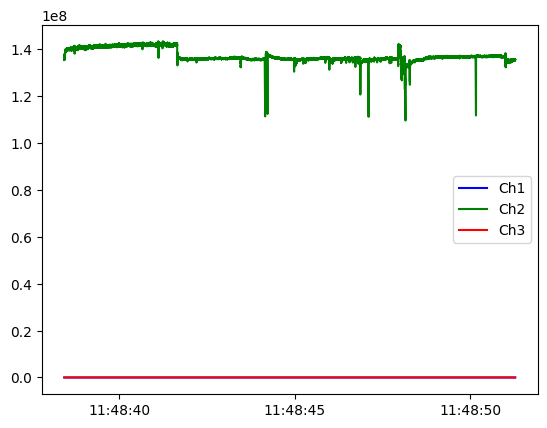

In [15]:
'''
#THIS PIECE OF CODE IS SIMPLY FOR PLOTTING THE PPG AND ACC DATA NOT REALLY USEFUL
import matplotlib.pyplot as plt
plt.figure()
for patientName in patient_data_dictionary:
    print("Processing Patient",patientName)
    dfs = patient_data_dictionary[patientName]
    plotFolderName = './visualizations/'+ patientName + '/'
    os.makedirs(plotFolderName, exist_ok=True)
    acc = dfs[0] #['ts', 'ch1', 'ch2', 'ch3']
    events = dfs[1] #['name', 'start', 'duration']
    ppg = dfs[2] #['ts', 'ch1', 'ch2', 'ch3']

    target_strings = ["Mixed Apnea", "Central Apnea", "Obstructive Apnea"]
    apneaEvents = events[events['name'].isin(target_strings)]
    nonApneaEvents = events[~events['name'].isin(target_strings)]
   
    for i, event in apneaEvents.iterrows():
        print(f"Processing event {i}",end = '\r')
        eventFolderName = plotFolderName+"Apnea" + str(i) + "/"
        os.makedirs(eventFolderName,exist_ok=True)
        ppgPlotFileName = eventFolderName + "ppg.png"
        accPlotFileName = eventFolderName + "acc.png"
        condition = (ppg['ts-datetime'] >= event['start-datetime']) & (ppg['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaPpg = ppg[condition]
        
        condition = (acc['ts-datetime'] >= event['start-datetime']) & (acc['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaAcc = (acc[condition])


        x = apneaPpg['ts-datetime'].values
        ch1 = apneaPpg['ch1'].values
        ch2= apneaPpg['ch2'].values
        ch3 = apneaPpg['ch3'].values
        plt.plot(x,ch1,label = "Ch1" ,color = 'blue')
        plt.plot(x,ch2,label = "Ch2",color = 'green')
        plt.plot(x,ch3,label = "Ch3", color= 'red')
        plt.legend()
      
        plt.savefig(ppgPlotFileName)
        plt.clf()



        x = apneaAcc['ts-datetime'].values
        ch1 = apneaAcc['ch1'].values
        ch2= apneaAcc['ch2'].values
        ch3 = apneaAcc['ch3'].values
        plt.plot(x,ch1,label = "Ch1",color = "blue")
        plt.plot(x,ch2,label = "Ch2",color= "green")
        plt.plot(x,ch3,label = "Ch3",color = "red")
        plt.legend()
        plt.savefig(accPlotFileName)
        plt.clf()

    for i, event in nonApneaEvents.iterrows():
        print(f"Processing event {i}",end = '\r')
        eventFolderName = plotFolderName+"Non_Apnea" + str(i) + "/"
        os.makedirs(eventFolderName,exist_ok=True)
        ppgPlotFileName = eventFolderName + "ppg.png"
        accPlotFileName = eventFolderName + "acc.png"
        condition = (ppg['ts-datetime'] >= event['start-datetime']) & (ppg['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaPpg = ppg[condition]
        
        condition = (acc['ts-datetime'] >= event['start-datetime']) & (acc['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaAcc = (acc[condition])


        x = apneaPpg['ts-datetime'].values
        ch1 = apneaPpg['ch1'].values
        ch2= apneaPpg['ch2'].values
        ch3 = apneaPpg['ch3'].values

        plt.plot(x,ch1,label = "Ch1" ,color = 'blue')
        plt.plot(x,ch2,label = "Ch2",color = 'green')
        plt.plot(x,ch3,label = "Ch3", color= 'red')
        plt.legend()
        
        plt.savefig(ppgPlotFileName)
        plt.clf()

        x = apneaAcc['ts-datetime'].values
        ch1 = apneaAcc['ch1'].values
        ch2= apneaAcc['ch2'].values
        ch3 = apneaAcc['ch3'].values
        plt.plot(x,ch1,label = "Ch1" ,color = 'blue')
        plt.plot(x,ch2,label = "Ch2",color = 'green')
        plt.plot(x,ch3,label = "Ch3", color= 'red')
        plt.legend()
    
        plt.savefig(accPlotFileName)
        plt.clf()

    

    print(f"Finished Processing Patient {patientName}")
'''
    


THE PIECE OF CODE BELOW EXTRACTS AND PLOTS MEAN, STD, AND VAR OF PPG AND ACC DATA


In [9]:
'''
#look for Mixed Apnea, Central Apnea, Obstructive Apnea in hte 10 patients
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
for patientName in patient_data_dictionary:
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))




    #all apnea ppg features for this patient
    apneaPpgMeans = []
    apneaPpgStds= []
    apneaPpgVars = []
    #all non-apnea ppg features for this patient
    nonApneaPpgMeans = []
    nonApneaPpgStds = []
    nonApneaPpgVars = []
    #all apnea acc features for this patient
    apneaAccMeans = []
    apneaAccStds = []
    apneaAccVars = []
    #all non-apnea acc features for this patient
    nonApneaAccMeans = []
    nonApneaAccStds = []
    nonApneaAccVars = []


    print("Processing Patient",patientName)
    dfs = patient_data_dictionary[patientName]
    plotFolderName = './visualizations/'+ patientName + '/'
    os.makedirs(plotFolderName, exist_ok=True)
    acc = dfs[0] #['ts', 'ch1', 'ch2', 'ch3']
    events = dfs[1] #['name', 'start', 'duration']
    ppg = dfs[2] #['ts', 'ch1', 'ch2', 'ch3']

    #normalize teh data
    ppg['ch2'] = (ppg['ch2'] - ppg['ch2'].min(axis = 0))/(ppg['ch2'].max(axis=0)-ppg['ch2'].min(axis=0))
    

    target_strings = ["Mixed Apnea", "Central Apnea", "Obstructive Apnea"]
    apneaEvents = events[events['name'].isin(target_strings)]
    nonApneaEvents = events[~events['name'].isin(target_strings)]
   
    for i, event in apneaEvents.iterrows():
        eventFolderName = plotFolderName+"Apnea" + str(i) + "/"
        print("Processing event " + str(i))
        condition = (ppg['ts'] >= event['start']) & (ppg['ts'] <= (event['start'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaPpg = ppg[condition]
        
        condition = (acc['ts'] >= event['start']) & (acc['ts'] <= (event['start'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaAcc = (acc[condition])


        x = apneaPpg['ts'].values
        ch1 = apneaPpg['ch1'].values
        ch2= apneaPpg['ch2'].values
        ch3 = apneaPpg['ch3'].values

        x = apneaAcc['ts'].values
        ch1 = apneaAcc['ch1'].values
        ch2= apneaAcc['ch2'].values
        ch3 = apneaAcc['ch3'].values


        eventPpg_mean = np.mean(apneaPpg['ch2'].values,axis = 0)
        apneaPpgMeans.append(eventPpg_mean)
        eventAcc_mean = np.mean(apneaAcc[['ch1','ch2','ch3']].values,axis = 0)
        apneaAccMeans.append(eventAcc_mean)

        eventPpg_std = np.std(apneaPpg['ch2'].values,axis = 0)
        apneaPpgStds.append(eventPpg_std)
        eventAcc_std = np.std(apneaAcc[['ch1','ch2','ch3']].values,axis = 0)
        apneaAccStds.append(eventAcc_std)


        eventPpg_var = np.var(apneaPpg['ch2'].values,axis = 0)
        apneaPpgVars.append(eventPpg_var)
        eventAcc_var = np.var(apneaAcc[['ch1','ch2','ch3']].values,axis = 0)
        apneaAccVars.append(eventAcc_var)

        with open(f"./{eventFolderName}/features.txt", 'w') as file:
            # Write lines to the file
            file.write(f"ppg Mean: {eventPpg_mean},Std: {eventPpg_std}, Var: {eventPpg_var}\n")
            file.write(f"acc Mean: {eventAcc_mean},Std: {eventAcc_std}, Var: {eventAcc_var}\n")


    for i, event in nonApneaEvents.iterrows():
        print("Processing event " + str(i))
        eventFolderName = plotFolderName+"Non_Apnea" + str(i) + "/"
        condition = (ppg['ts'] >= event['start']) & (ppg['ts'] <= (event['start'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaPpg = ppg[condition]
        
        condition = (acc['ts'] >= event['start']) & (acc['ts'] <= (event['start'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaAcc = (acc[condition])


        x = apneaPpg['ts'].values
        ch1 = apneaPpg['ch1'].values
        ch2= apneaPpg['ch2'].values
        ch3 = apneaPpg['ch3'].values

        x = apneaAcc['ts'].values
        ch1 = apneaAcc['ch1'].values
        ch2= apneaAcc['ch2'].values
        ch3 = apneaAcc['ch3'].values

        eventPpg_mean = np.mean(apneaPpg['ch2'].values,axis = 0)
        nonApneaPpgMeans.append(eventPpg_mean)
        eventAcc_mean = np.mean(apneaAcc[['ch1','ch2','ch3']].values,axis = 0)
        nonApneaAccMeans.append(eventAcc_mean)

        eventPpg_std = np.std(apneaPpg['ch2'].values,axis = 0)
        nonApneaPpgStds.append(eventPpg_std)
        eventAcc_std = np.std(apneaAcc[['ch1','ch2','ch3']].values,axis = 0)
        nonApneaAccStds.append(eventAcc_std)


        eventPpg_var = np.var(apneaPpg['ch2'].values,axis = 0)
        nonApneaPpgVars.append(eventPpg_var)
        eventAcc_var = np.var(apneaAcc[['ch1','ch2','ch3']].values,axis = 0)
        nonApneaAccVars.append(eventAcc_var)

        with open(f"./{eventFolderName}/features.txt", 'w') as file:
            # Write lines to the file
            file.write(f"ppg Mean: {eventPpg_mean},Std: {eventPpg_std}, Var: {eventPpg_var}\n")
            file.write(f"acc Mean: {eventAcc_mean},Std: {eventAcc_std}, Var: {eventAcc_var}\n")

    axes[0, 0].scatter([0] * len(apneaPpgMeans), apneaPpgMeans, marker='o', color="red", label="Apnea")
    axes[0, 0].scatter([1] * len(nonApneaEvents), nonApneaPpgMeans, marker='o', color="green", label="Non-Apnea")
    axes[0, 0].set_xticks([0, 1], ['Apnea', 'Non-Apnea'])
    axes[0, 0].set_title("Ppg Means")

    axes[0, 1].set_title("Ppg Stds")
    axes[0, 1].scatter([0] * len(apneaPpgStds), apneaPpgStds, marker='o', color="red", label="Apnea")
    axes[0, 1].scatter([1] * len(nonApneaPpgStds), nonApneaPpgMeans, marker='o', color="green", label="Non-Apnea")
    axes[0, 1].set_xticks([0, 1], ['Apnea', 'Non-Apnea'])

    axes[0, 2].set_title("Ppg_Vars")
    axes[0, 2].scatter([0] * len(apneaPpgVars), apneaPpgVars, marker='o', color="red", label="Apnea")
    axes[0, 2].scatter([1] * len(nonApneaPpgVars), nonApneaPpgVars, marker='o', color="green", label="Non-Apnea")
    axes[0, 2].set_xticks([0, 1], ['Apnea', 'Non-Apnea'])

    # Plotting 3D Acc Features
    # Means
    ax_3d_means = fig.add_subplot(2, 3, 4, projection='3d')
    ax_3d_means.set_title("Acc Means")
    
    if(len(apneaAccMeans)):
        x, y, z = zip(*apneaAccMeans)
        ax_3d_means.scatter(x, y, z, marker='o', color="red", label="Apnea")
    if(len(nonApneaAccMeans)):
        x, y, z = zip(*nonApneaAccMeans)
        ax_3d_means.scatter(x, y, z, marker='o', color="green", label="Non-Apnea")
    ax_3d_means.legend()
    

    # Stds
    ax_3d_stds = fig.add_subplot(2, 3, 5, projection='3d')
    ax_3d_stds.set_title("Acc Stds")
    
    if(len(apneaAccStds)):
        x, y, z = zip(*apneaAccStds)
        ax_3d_stds.scatter(x, y, z, marker='o', color="red", label="Apnea")

    if(len(nonApneaAccStds)):
        x, y, z = zip(*nonApneaAccStds)
        ax_3d_stds.scatter(x, y, z, marker='o', color="green", label="Non-Apnea")
    ax_3d_stds.legend()

    # Vars
    ax_3d_vars = fig.add_subplot(2, 3, 6, projection='3d')
    ax_3d_vars.set_title("Acc Vars")
    

    if(len(apneaAccVars)):
        x, y, z = zip(*apneaAccVars)
        ax_3d_vars.scatter(x, y, z, marker='o', color="red", label="Apnea")
    if(len(nonApneaAccVars)):
        x, y, z = zip(*nonApneaAccVars)
        ax_3d_vars.scatter(x, y, z, marker='o', color="green", label="Non-Apnea")
    ax_3d_vars.legend()

    plt.tight_layout()
    plt.savefig(f"{plotFolderName}features.png")
    plt.clf()
'''
    



    
    



Processing Patient 2020-08-17T211411-0400_5007-ELYP-1F41
Processing event 19
Processing event 0
Processing event 1
Processing event 2
Processing event 3
Processing event 4
Processing event 5
Processing event 6
Processing event 7
Processing event 8
Processing event 9
Processing event 10
Processing event 11
Processing event 12
Processing event 13
Processing event 14
Processing event 15
Processing event 16
Processing event 17
Processing event 18
Processing event 20
Processing event 21
Processing event 22
Processing event 23
Processing event 24
Processing event 25
Processing event 26
Processing event 27
Processing event 28
Processing event 29
Processing event 30
Processing event 31
Processing event 32
Processing event 33
Processing event 34
Processing event 35
Processing event 36
Processing event 37
Processing event 38
Processing event 39
Processing event 40
Processing event 41
Processing event 42
Processing event 43
Processing event 44
Processing event 45
Processing event 46
Processing

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

THE PIECE OF CODE BELOW EXTRACTS FEATURES USING NEUROKIT LIBRARY

In [8]:
#extract features from the ppg data
#try extracting peaks from ppg data

MUSE_PPG_SAMPLING_RATE = 64
randomPatient = random.choice(list(patient_data_dictionary.keys()))
print(f"Randomly choice Patient: {randomPatient}")

#define accumulate for all patients' analysis
allPatientAnalysis_dfs = []
for patientName in patient_data_dictionary:
    plotFolderName = './visualizations/'+ patientName + '/'
    print("Processing Patient",patientName)
    dfs = patient_data_dictionary[patientName]
    folder_name = './visualizations/'+ patientName + '/'
    os.makedirs(plotFolderName, exist_ok=True)
    acc = dfs[0] #['ts', 'ch1', 'ch2', 'ch3']
    events = dfs[1] #['name', 'start', 'duration']
    ppg = dfs[2] #['ts', 'ch1', 'ch2', 'ch3']

    #normalize teh data
    ppg['ch2'] = (ppg['ch2'] - ppg['ch2'].min(axis = 0))/(ppg['ch2'].max(axis=0)-ppg['ch2'].min(axis=0))
    
    #define cumulation for analyze_dfs
    apnea_analyze_dfs = []
    non_apnea_analyze_dfs = []


    target_strings = ["Mixed Apnea", "Central Apnea", "Obstructive Apnea"]
    apneaEvents = events[events['name'].isin(target_strings)]
    nonApneaEvents = events[~events['name'].isin(target_strings)]
    print("Processing Apnea Events")
    for i, event in apneaEvents.iterrows():
        print("Processing event " + str(i))
        condition = (ppg['ts-datetime'] >= event['start-datetime']) & (ppg['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaPpg = ppg[condition]
        apneaPpg = apneaPpg[['ts-datetime','ts','ch2']]
        timeStamps = apneaPpg['ts'].values
        PPG = apneaPpg['ch2'].values


        # Use the correct element from the tuple
        signals,info = nk.ppg_process(PPG, timestamps=timeStamps, sampling_rate=MUSE_PPG_SAMPLING_RATE)
        analyze_df = nk.ppg_analyze(signals,sampling_rate = MUSE_PPG_SAMPLING_RATE)
        
        #accumulate all the apnea analyze df's
        apnea_analyze_dfs.append(analyze_df)


    print("Processing Non-Apnea Events")
    for i, event in nonApneaEvents.iterrows():

        print("Processing event " + str(i))
        condition = (ppg['ts-datetime'] >= event['start-datetime']) & (ppg['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        nonApneaPpg = ppg[condition]
        nonApneaPpg = nonApneaPpg[['ts-datetime','ts','ch2']]
        timeStamps = nonApneaPpg['ts'].values
        PPG = nonApneaPpg['ch2'].values

        signals,info = nk.ppg_process(PPG,timestamps = timeStamps, sampling_rate = MUSE_PPG_SAMPLING_RATE)
        analyze_df = nk.ppg_analyze(signals,sampling_rate = MUSE_PPG_SAMPLING_RATE)

        #acculumate all the non-apnea analyze df's
        non_apnea_analyze_dfs.append(analyze_df)

    #make merged dfs of all apnea and non-apnea
    merged_apnea_df = pd.concat(apnea_analyze_dfs,ignore_index = True)
    merged_apnea_df['apnea'] = True
    merged_non_apnea_df = pd.concat(non_apnea_analyze_dfs,ignore_index = True)
    merged_non_apnea_df['apnea'] = False

    #accumulate all event analysis for this particular patient
    analyze_df = pd.concat(merged_apnea_df,merged_non_apnea_df,ignore_index = True)
    allPatientAnalysis_dfs.append(analyze_df)

#accumulate all event analysis for ALL patient
allPatientAnalysis_df = pd.concat(allPatientAnalysis_dfs,ignore_index=True)


outputFolderName= './visualizations/'
for column_name, column_data in allPatientAnalysis_df.iteritems():
    plotName = f"{outputFolderName}{column_name}.png"

    apnea_data = column_data[column_data['apnea'] == True].values
    non_apnea_data = column_data[column_data['apnea'] == False].values

    plt.clf()
    plt.scatter([1]*len(non_apnea_data),non_apnea_data)
    plt.scatter([0]*len(apnea_data),apnea_data)
    plt.set_xticks([0,1],['Apnea','Non-Apnea'])
    plt.title(column_name)
    plt.savefig(plotName)
    plt.clf()

Randomly choice Patient: 2020-09-11T211719-0400_5007-ELYP-1F41
Processing Patient 2020-08-17T211411-0400_5007-ELYP-1F41
Processing Apnea Events
Processing event 19


KeyError: 'ts-datetime'

THE PIECE OF CODE BELOW PLOTS THE PEAKS OF THE PPG DATA

In [18]:
#extract features from the ppg data
#try extracting peaks from ppg data

MUSE_PPG_SAMPLING_RATE = 64
randomPatient = random.choice(list(patient_data_dictionary.keys()))
print(f"Randomly choice Patient: {randomPatient}")

#define accumulate for all patients' analysis
allPatientAnalysis_dfs = []
for patientName in patient_data_dictionary:
    plt.clf()
    plotFolderName = './visualizations/'+ patientName + '/'
    print("Processing Patient",patientName)
    dfs = patient_data_dictionary[patientName]
    folder_name = './visualizations/'+ patientName + '/'
    os.makedirs(plotFolderName, exist_ok=True)
    acc = dfs[0] #['ts', 'ch1', 'ch2', 'ch3']
    events = dfs[1] #['name', 'start', 'duration']
    ppg = dfs[2] #['ts', 'ch1', 'ch2', 'ch3']

    #normalize teh data
    ppg['ch2'] = (ppg['ch2'] - ppg['ch2'].min(axis = 0))/(ppg['ch2'].max(axis=0)-ppg['ch2'].min(axis=0))
    
    #define cumulation for analyze_dfs
    apnea_analyze_dfs = []
    non_apnea_analyze_dfs = []


    target_strings = ["Mixed Apnea", "Central Apnea", "Obstructive Apnea"]
    apneaEvents = events[events['name'].isin(target_strings)]
    nonApneaEvents = events[~events['name'].isin(target_strings)]
    print("Processing Apnea Events")
    for i, event in apneaEvents.iterrows():
        print("Processing event " + str(i))
        condition = (ppg['ts-datetime'] >= event['start-datetime']) & (ppg['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        apneaPpg = ppg[condition]
        apneaPpg = apneaPpg[['ts-datetime','ts','ch2']]
        timeStamps = apneaPpg['ts'].values
        PPG = apneaPpg['ch2'].values


        # Use the correct element from the tuple
        signals,info = nk.ppg_process(PPG, timestamps=timeStamps, sampling_rate=MUSE_PPG_SAMPLING_RATE)
        peaks = (info['PPG_Peaks'])
        plt.scatter([0]*len(peaks),peaks,color='red')


    print("Processing Non-Apnea Events")
    for i, event in nonApneaEvents.iterrows():

        print("Processing event " + str(i))
        condition = (ppg['ts-datetime'] >= event['start-datetime']) & (ppg['ts-datetime'] <= (event['start-datetime'] + pd.to_timedelta(event['duration'], unit='s')))
        nonApneaPpg = ppg[condition]
        nonApneaPpg = nonApneaPpg[['ts-datetime','ts','ch2']]
        timeStamps = nonApneaPpg['ts'].values
        PPG = nonApneaPpg['ch2'].values

        signals,info = nk.ppg_process(PPG,timestamps = timeStamps, sampling_rate = MUSE_PPG_SAMPLING_RATE)
        peaks = (info['PPG_Peaks'])
        plt.scatter([1]*len(peaks),peaks,color='green')

    plt.xticks([0,1],['Apnea','Non-Apnea'])

    plt.savefig(f"./visualizations/{patientName}/peaks.png")


Randomly choice Patient: 2020-08-17T211411-0400_5007-ELYP-1F41
Processing Patient 2020-08-17T211411-0400_5007-ELYP-1F41
Processing Apnea Events
Processing event 19
Processing Non-Apnea Events
Processing event 0


Processing event 1
Processing event 2
Processing event 3
Processing event 4
Processing event 5
Processing event 6
Processing event 7
Processing event 8
Processing event 9
Processing event 10
Processing event 11
Processing event 12
Processing event 13
Processing event 14
Processing event 15
Processing event 16
Processing event 17
Processing event 18
Processing event 20
Processing event 21
Processing event 22
Processing event 23
Processing event 24
Processing event 25
Processing event 26
Processing event 27
Processing event 28
Processing event 29
Processing event 30
Processing event 31
Processing event 32
Processing event 33
Processing event 34
Processing event 35
Processing event 36
Processing event 37
Processing event 38
Processing event 39
Processing event 40
Processing event 41
Processing event 42
Processing event 43
Processing event 44
Processing event 45
Processing event 46
Processing event 47
Processing event 48
Processing event 49
Processing event 50
Processing event 51
Processin

KeyboardInterrupt: 